## Test des paramètres à 100 items

In [5]:
from tools.testor import *
import tools.parser as parser
from tools.SadObject import *
import tools.tabou_solver as tbs
from tools.tabou_solver import *
from tools.Other_solver import Other_solver
from tools.MyIterator import *

import numpy as np
import matplotlib.pyplot as plt

sad1 = parser.loadFromFile("Data/pi-12-10000-1000-001.kna")
sad2 = parser.loadFromFile("Data/pi-13-10000-1000-001.kna")
sad3 = parser.loadFromFile("Data/pi-15-10000-1000-001.kna")


solver = Other_solver(sad1)
sol_opti1,_ = solver.solve()

solver = Other_solver(sad2)
sol_opti2,_ = solver.solve()

solver = Other_solver(sad3)
sol_opti3,_ = solver.solve()

print("les solutions optimales sont")
print("sad 1 :",sol_opti1,"pour",sad1.name)
print("sad 2 :",sol_opti2,"pour",sad2.name)
print("sad 3 :",sol_opti3,"pour",sad3.name)

load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\zlib1.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\abseil_dll.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\utf8_validity.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\re2.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\libprotobuf.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\highs.dll...
load C:\Users\ninot\AppData\Roaming\Python\Python313\site-packages\ortools\.libs\ortools.dll...


loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 450klines/s]
loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 387klines/s]
loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 400klines/s]

les solutions optimales sont
sad 1 : 45105 pour pi-12-10000-1000-001.kna
sad 2 : 64077 pour pi-13-10000-1000-001.kna
sad 3 : 50622 pour pi-15-10000-1000-001.kna


## Lecture des graphiques :

Le + rouge est la médianne, la moyenne est le point bleu.
Les barres bleues représentent les limites des percentile 80 et 20

### Pour la liste Tabu

Voici les différents paramètres amenés à évoluer :
-    iter_max : Nombre maximum d'itération de la boucle du solver 
-    tabu_size : Taille de la liste tabu
-   max_weight : si =1, on essaye de trouver une solution inférieur à la capacité. Si c'est 2, 2 fois la capacité, etc.
- def_sol_size : rapport entre la capactié du sac à dos et le poids de la solution initiale (0.5, moitié de la capacité)

#### Initialisation des paramètres

In [8]:
iter_max = 3000
tabu_size = 1000
max_weight = 1.001
init_size = 0.01

group_size = 3 #nombre de tests de chaque paramètres dans une éxecutions.

#### Test taille TABU

calcul: 100%|██████████| 15/15 [03:06<00:00, 12.46s/batch]


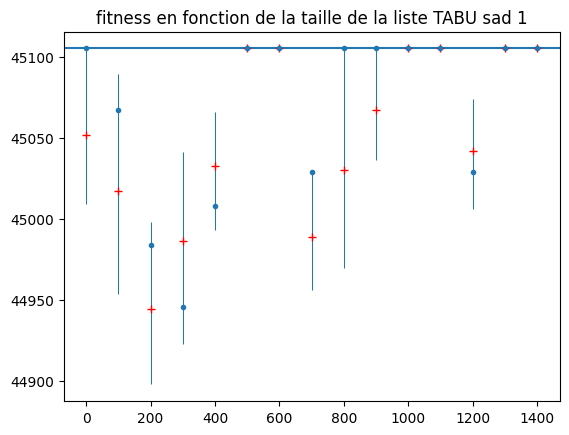

calcul: 100%|██████████| 15/15 [03:07<00:00, 12.52s/batch]


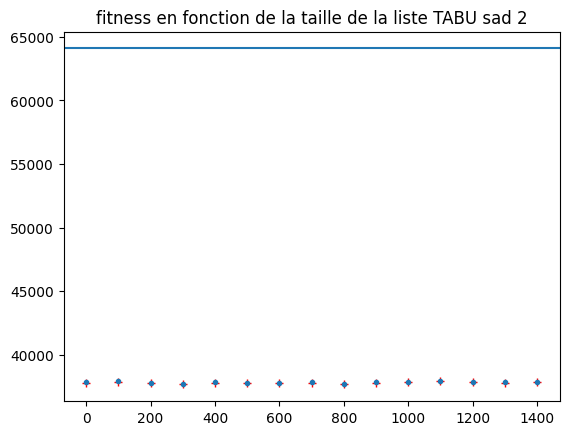

calcul: 100%|██████████| 15/15 [03:56<00:00, 15.78s/batch]


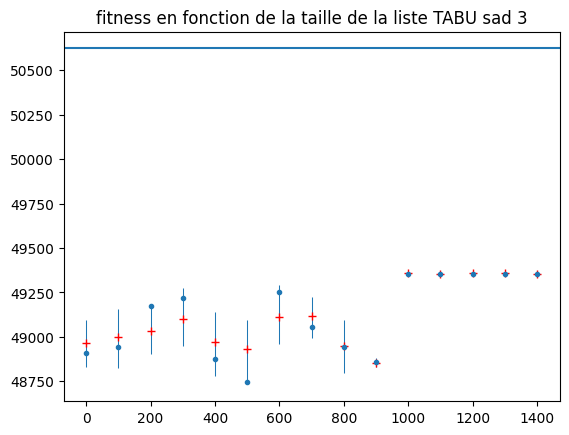

In [6]:
(variateur,title) = variateur_tabou.liste_tabou()

test = Testor(tbs.Tabou_solver(sad1,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(range(0,1500,100),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.Tabou_solver(sad2,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(range(0,1500,190),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.Tabou_solver(sad3,iter_max,tabu_size,max_weight,init_size))
testResult = test.test(range(0,1500,100),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")

#### Affinage tabou

calcul: 100%|██████████| 8/8 [05:38<00:00, 42.32s/batch] 


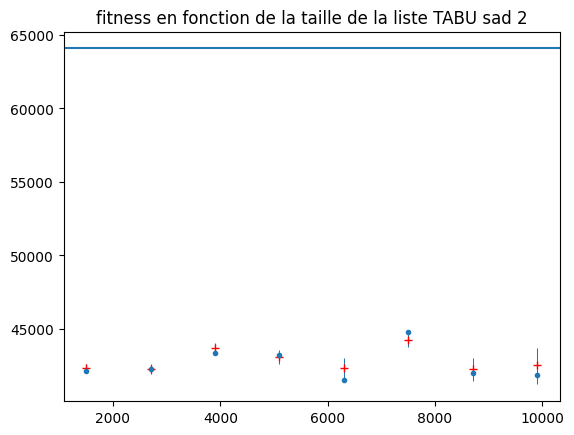

In [10]:
(variateur,title) = variateur_tabou.liste_tabou()

#on met 10k sinon forcément c'est useless ...
#on a récupéré les coeffs optimaux après méta heuristique
test = Testor(tbs.Tabou_solver(sad2,10000,0,1,1))
testResult = test.test(range(1500,10000,1200),variateur,3)
graph_test_result(testResult,sol_opti2,title + " sad 2")


Pour le premier sac à dos  : ça n'a pas l'air de changer grand chose (mais autour de 250 c'était pas mal)

Pour le second : Entre 950 et 990 ça marche bien

Pour le troisième : le mieux a l'air entre d'être entre 50 et 125

on prend 100 pour le 1er et le 3ème, 600 pour le second

In [9]:
tabu_size_1 = 1000
tabu_size_2 = 100
tabu_size_3 = 1000

calcul: 100%|██████████| 12/12 [04:16<00:00, 21.34s/batch]


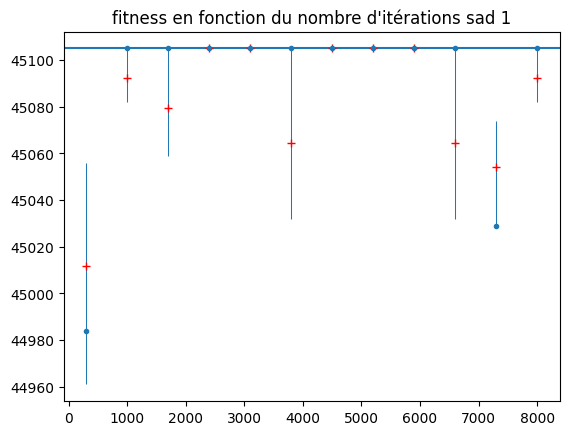

calcul: 100%|██████████| 12/12 [04:30<00:00, 22.52s/batch]


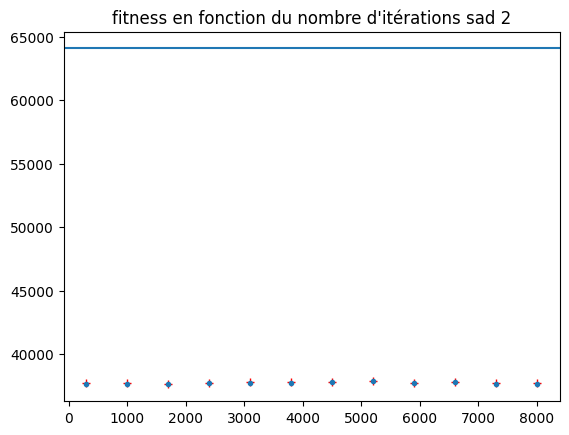

calcul: 100%|██████████| 12/12 [04:24<00:00, 22.08s/batch]


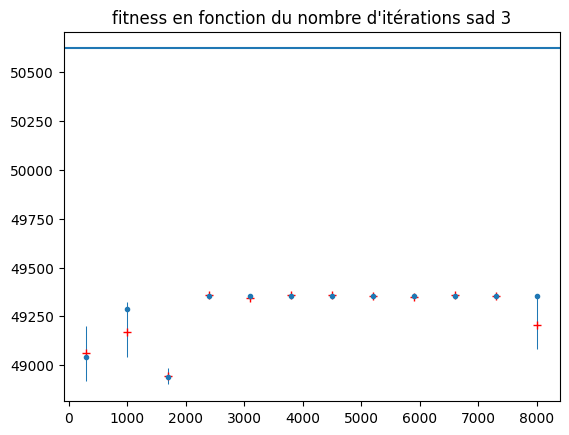

In [10]:
(variateur,title) = variateur_tabou.nombre_iterations()

iterat = range(8000,10,-700)

solver = tbs.Tabou_solver(sad1,iter_max,tabu_size_1,max_weight,init_size)
testResult = Testor(solver).test(iterat,variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.Tabou_solver(sad2,iter_max,tabu_size_2,max_weight,init_size))
testResult = test.test(iterat,variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.Tabou_solver(sad3,iter_max,tabu_size_3,max_weight,init_size))
testResult = test.test(iterat,variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


pour le premier sac à dos : au delà de 2000, ça a l'air d'être le mieux

pour le second : ça ne semble rien changer....on laisse

Pour le 3ième : à partir de 2400 on atteint un plateau

On laisse 3000 pour tout le monde pour éviter de rater un truc

## Le poids maximal accepté

In [ ]:
iter_max = 3000 # on récupère le résultat précédent

16


calcul: 100%|██████████| 16/16 [03:40<00:00, 13.80s/batch]


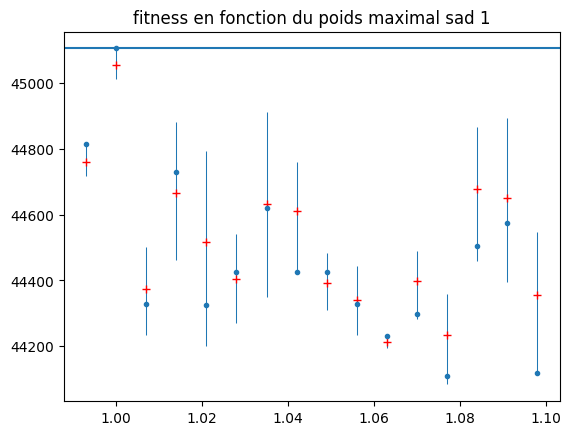

calcul: 100%|██████████| 16/16 [03:51<00:00, 14.48s/batch]


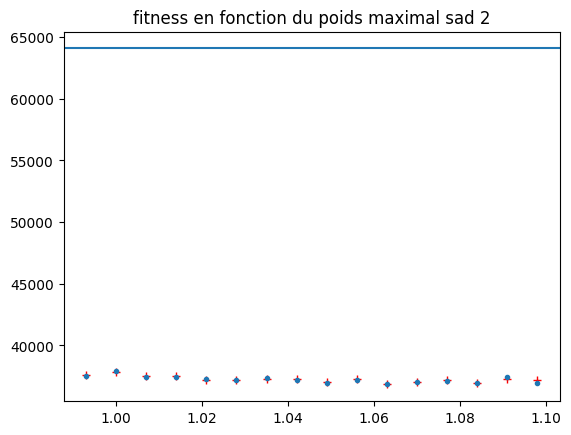

calcul: 100%|██████████| 16/16 [04:33<00:00, 17.12s/batch]


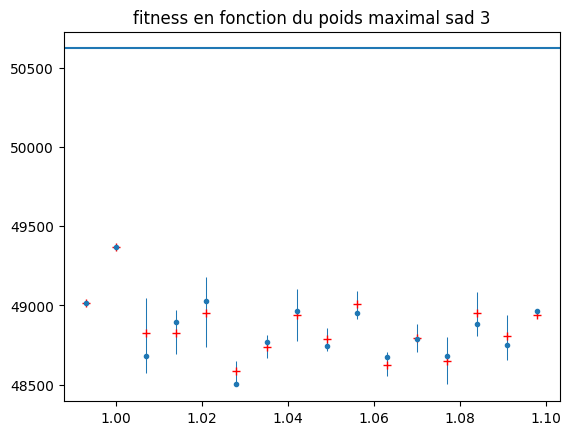

In [14]:
iter = floatRange(0.993,1.1,0.007)

(var,titre) = variateur_tabou.poids_max_accepte()
#on donne une taille initiale très faible pour mieux observer l'impacte du poids max accepté
solver = tbs.Tabou_solver(sad1,iter_max,tabu_size_1,0,def_sol_size=0.01)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbs.Tabou_solver(sad2,iter_max,tabu_size_2,0,def_sol_size=0.01)
testResult = Testor(solver).test(iter ,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbs.Tabou_solver(sad3,iter_max,tabu_size_3,0,def_sol_size=0.01)
testResult = Testor(solver).test(iter,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")



pour le 1er et le 3eme sac à dos, il vaut mieux garder 1 (sinon on prend des valeurs de croisement) 

pour le second, aussi, mais la différence n'est pas aussi flagrante

De manière générale, le mieux c'est de garder 1, ça a l'air de mieux marcher.

## variation de la taille de la solution initiale

In [ ]:
max_weight = 1.0

16


calcul: 100%|██████████| 16/16 [03:51<00:00, 14.50s/batch]


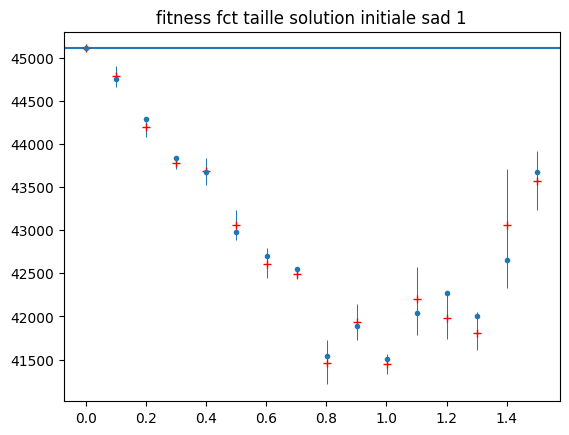

calcul: 100%|██████████| 16/16 [04:17<00:00, 16.11s/batch]


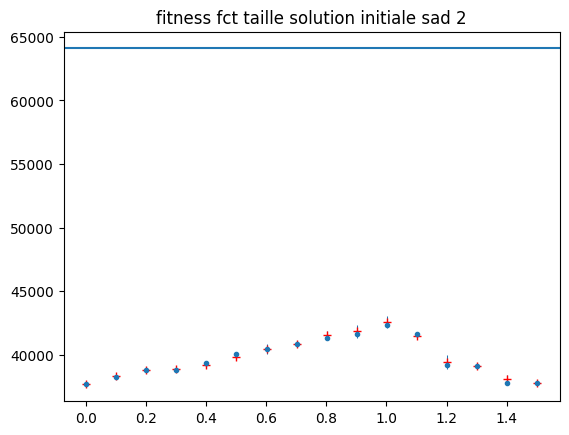

calcul: 100%|██████████| 16/16 [04:16<00:00, 16.02s/batch]


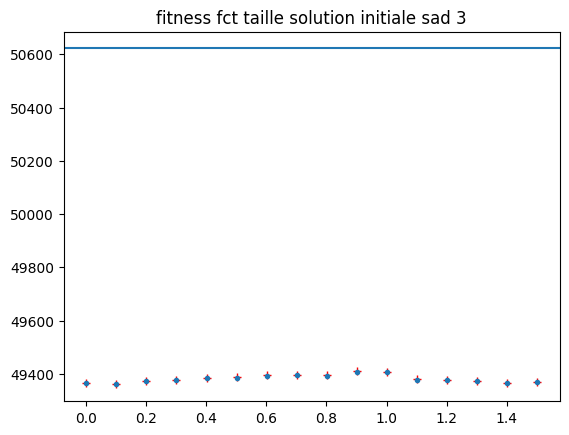

In [19]:
(variateur,title) = variateur_tabou.poids_inital()
closeIter = floatRange(0.001,1.6,0.1)
test = Testor(tbs.Tabou_solver(sad1,iter_max,tabu_size_1,max_weight,init_size))

testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.Tabou_solver(sad2,iter_max,tabu_size_2,max_weight,init_size))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.Tabou_solver(sad3,iter_max,tabu_size_3,max_weight,init_size))
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


pour le premier sac à dos, il vaut mieux garder un sac le plus vide possible.

Pour le 2nd et le 3eme, apparament, il vaut mieux le remplir à 100% par défaut.

### Résultats "optimaux"

In [6]:
tabu_size_1= 420
tabu_size_2 = 960
tabu_size_3 = 100

iter1 = 3000
iter2 = 3000
iter3 = 3000

isize1 = 0.001
isize2 = 1
isize3 = 1

max_weight = 1

In [ ]:
solver1 = tbs.Tabou_solver(sad1,iter1,tabu_size_1,max_weight,isize1)
solver2 = tbs.Tabou_solver(sad2,iter2,tabu_size_2,max_weight,isize2)
solver3 = tbs.Tabou_solver(sad3,iter3,tabu_size_3,max_weight,isize3)

#TODO : tester le temps que ça prend ?

### Pour le génitif